In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
df=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [26]:
df=df.drop(columns=['customerID'])

In [27]:
df['Churn'] = df['Churn'].map({'Yes':1, 'No':0})

In [28]:
df = pd.get_dummies(df, drop_first=True)


In [29]:
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [30]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

y_pred = lr.predict(X_test_scaled)


In [32]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# print(classification_report(y_test, y_pred))

Accuracy: 0.7764371894960965
Precision: 0.5930599369085173
Recall: 0.5026737967914439
F1 Score: 0.5441389290882779


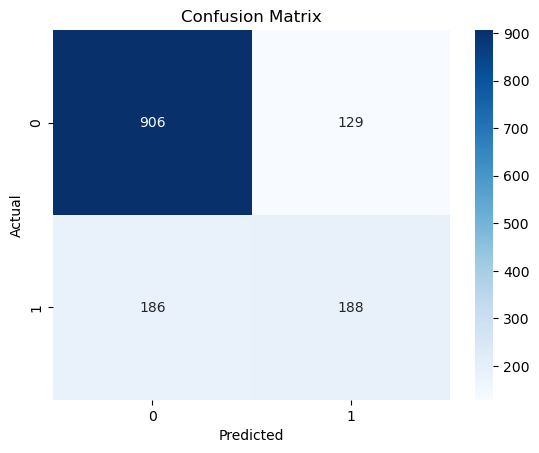

In [33]:

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [16]:
importance = pd.Series(
    lr.coef_[0], index=X.columns
).sort_values(ascending=False)

importance.head(10)

StreamingMovies_Yes               1.003931
PaymentMethod_Electronic check    0.925098
PaperlessBilling_Yes              0.724422
InternetService_Fiber optic       0.713462
PaymentMethod_Mailed check        0.500785
MonthlyCharges                    0.423186
PhoneService_Yes                  0.399536
TotalCharges_740.3                0.266454
TotalCharges_20.2                 0.250553
TotalCharges_1021.8               0.247891
dtype: float64

In [34]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=50,
    random_state=42
)

dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=50, random_state=42)

In [35]:
y_pred_dt = dt.predict(X_test)

In [36]:
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.794180269694819
[[917 118]
 [172 202]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1035
           1       0.63      0.54      0.58       374

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.79      0.79      1409



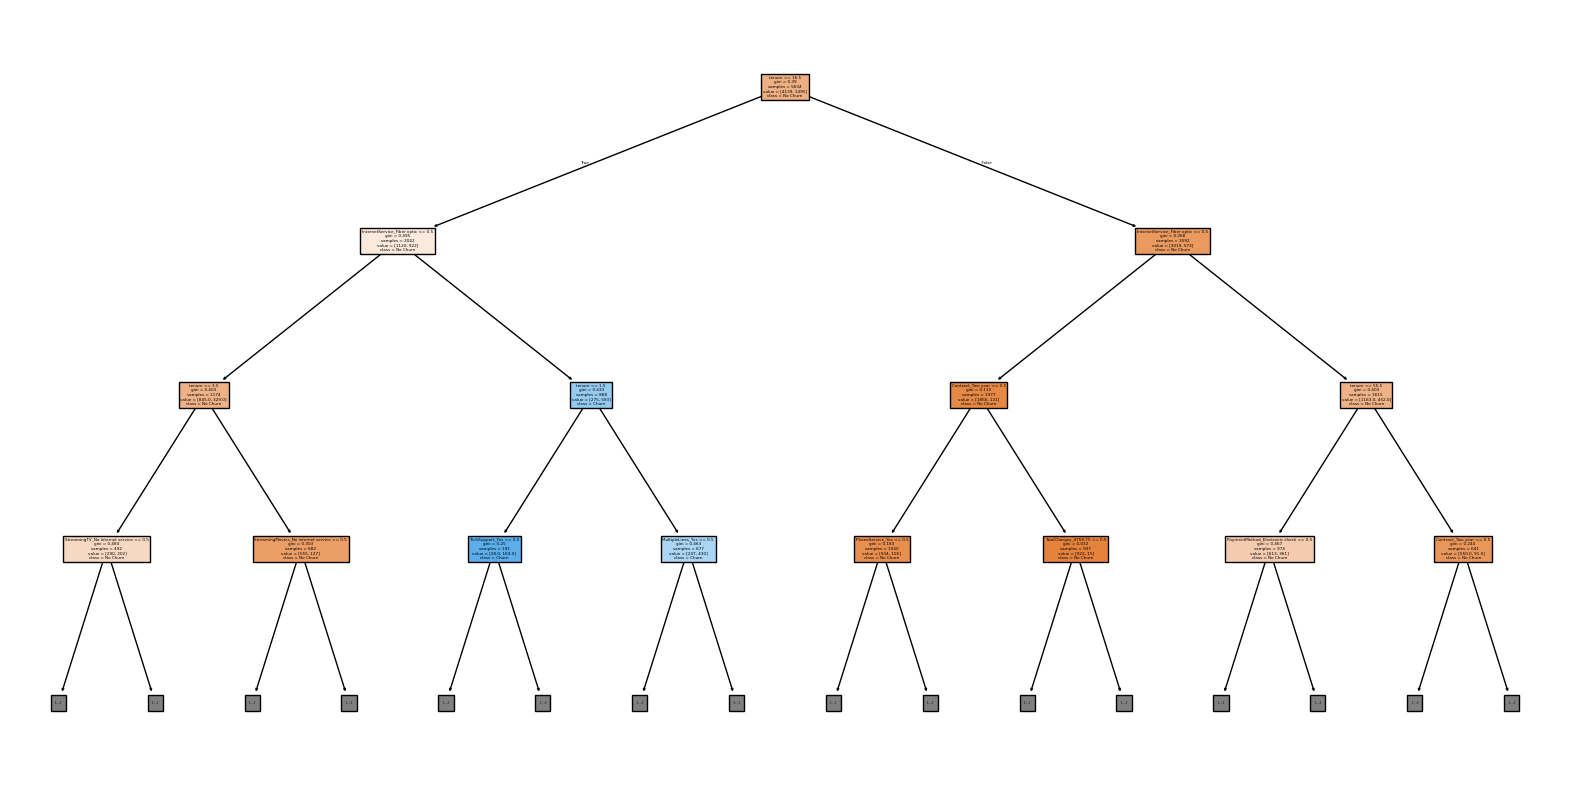

In [37]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(
    dt,
    feature_names=X.columns,
    class_names=['No Churn', 'Churn'],
    filled=True,
    max_depth=3
)
plt.show()

In [38]:
dt_importance = pd.Series(
    dt.feature_importances_, index=X.columns
).sort_values(ascending=False)

dt_importance.head(10)

tenure                                 0.451088
InternetService_Fiber optic            0.358179
PaymentMethod_Electronic check         0.036407
MonthlyCharges                         0.024769
MultipleLines_Yes                      0.023309
StreamingTV_No internet service        0.020705
Contract_Two year                      0.019634
StreamingMovies_No internet service    0.017410
TechSupport_Yes                        0.012979
Contract_One year                      0.008568
dtype: float64